<a href="https://colab.research.google.com/github/iskanor1/Digital-English/blob/main/Digital_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
avnishnish_mnist_original_path = kagglehub.dataset_download('avnishnish/mnist-original')

print('Data source import complete.')


Data source import complete.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

First, load data from [MNIST](https://www.kaggle.com/avnishnish/mnist-original) dataset

In [ ]:
def load_mnist_dataset():
    """
    Load mnist-original dataset

    Returns:
    mnist_data -- an array of arrays in the shape of (784,)
    mnist_label -- an array of labels
    classes -- array of labels classes(a set of labels)
    shape -- shape of data item
    channels_count -- channel count of data images
    """

    mnist = loadmat("/kaggle/input/mnist-original/mnist-original.mat")
    mnist_data = mnist["data"].T
    mnist_data = mnist_data.reshape(len(mnist_data), 28, 28, 1)
    mnist_label = mnist["label"][0]
    count = len(set(mnist_label))
    return mnist_data, mnist_label, count, (28, 28, 1)


data, labels, classes_count, data_shape = load_mnist_dataset()

print("data shape: " + str(data.shape))
print("labels shape: " + str(labels.shape))
print("classes count: " + str(classes_count))

data shape: (70000, 28, 28, 1)
labels shape: (70000,)
classes count: 10


Well let's take a look at some of the images in dataset

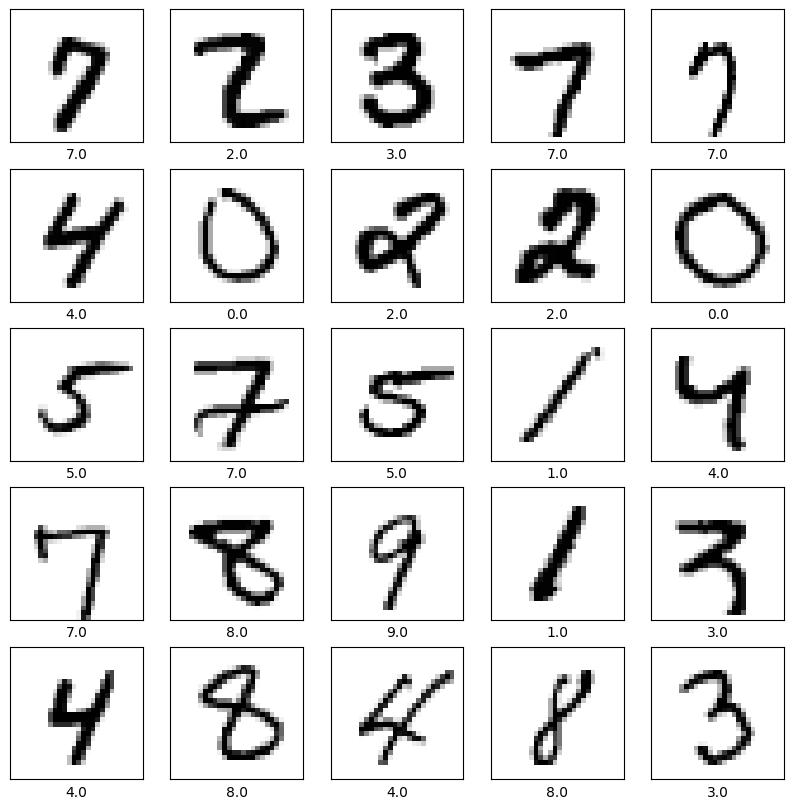

In [ ]:
def plot_images_sample(X, Y):
    plt.figure(figsize=(10,10))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays,
        # which is why you need the extra index
        plt.xlabel(Y[index])
    plt.show()


plot_images_sample(data, labels)

Before we continue, we need to prepare our data for the model
* first, we need to splite data in 2 parts, train set and test set, so we make sure that the model does not train on test set
* then, we need to make our input data in the range of 0 to 1 so it become easier for model to be trained
* and finally, we in order to use our labels in the model we need to convert the to one hot encoding

In [ ]:
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(data, labels, test_size=0.1, shuffle=True)

X_train = x_train_orig / 255.
X_test = x_test_orig / 255.
Y_train = to_categorical(y_train_orig)
Y_test = to_categorical(y_test_orig)

**Define the model structure**

this model includes 2 Conv layer each followed by a MaxPooling layer, and at the end after flattening, we have a fully connected layer.

In [ ]:
model = models.Sequential([
        layers.Conv2D(8, kernel_size=(4, 4), strides=(1, 1), padding='same', activation='relu', input_shape=data_shape),
        layers.MaxPooling2D((8, 8), padding='same'),
        layers.Conv2D(16, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'),
        layers.MaxPooling2D((4, 4), padding='same'),
        layers.Flatten(),
        layers.Dense(classes_count)
    ])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 8)      │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 4, 4, 16)       │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 834 (3.26 KB)

 Trainable params: 834 (3.26 KB)

 Non-trainable params: 0 (0.00 B)

Everything is ready to compile and train our model...

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.5044 - loss: 1.5636 - val_accuracy: 0.8692 - val_loss: 0.4400
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.8859 - loss: 0.3879 - val_accuracy: 0.9078 - val_loss: 0.2977
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9150 - loss: 0.2797 - val_accuracy: 0.9211 - val_loss: 0.2533
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.9255 - loss: 0.2398 - val_accuracy: 0.9279 - val_loss: 0.2281
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9346 - loss: 0.2119 - val_accuracy: 0.9370 - val_loss: 0.1986
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9392 - loss: 0.1916 - val_accuracy: 0.9395 - val_loss: 0.1925
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9434 - loss: 0.1766 - val_accuracy: 0.9424 - val_loss: 0.1792
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9463 -

Very well, now we can look at the result and see what we have done so far

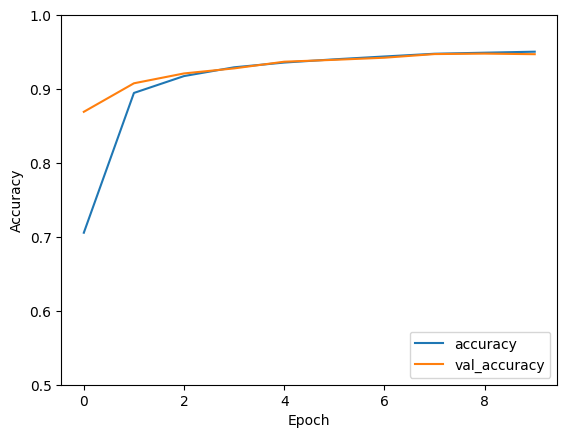

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

and the test accuracy is

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("test accuracy: " + str(test_acc))

219/219 - 1s - 6ms/step - accuracy: 0.9456 - loss: 0.1704
test accuracy: 0.9455714225769043


Let's look at some predictions sample

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


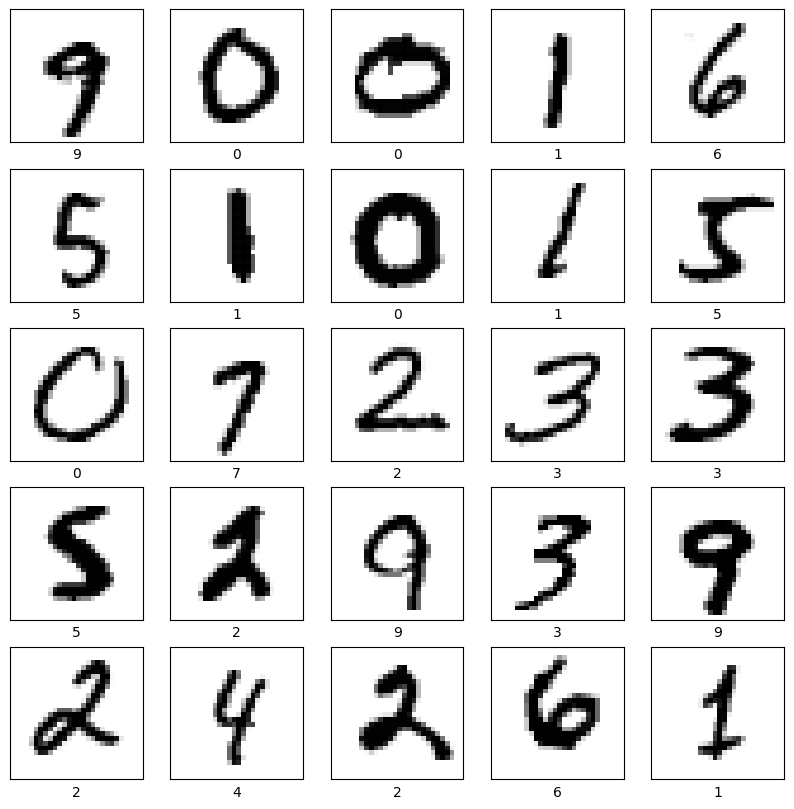

In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

plot_images_sample(X_test, predictions)

and here we have some wrong prediction samples

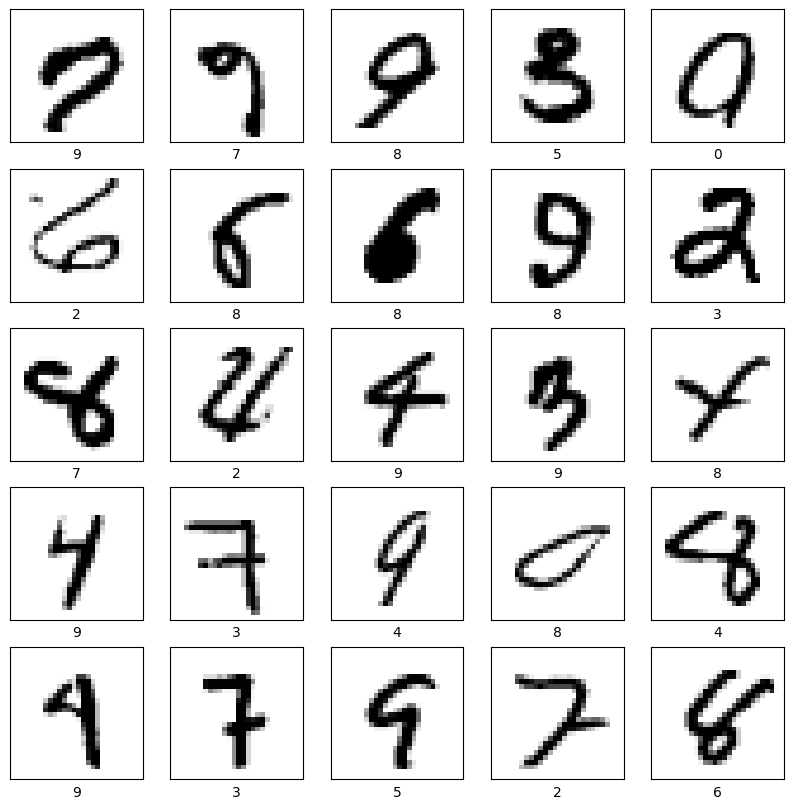

In [ ]:
X_test_wrong = []
predictions_wrong = []
for i in range(len(X_test)):
    if predictions[i] != np.argmax(Y_test[i]):
        X_test_wrong.append(X_test[i])
        predictions_wrong.append(predictions[i])

plot_images_sample(X_test_wrong, predictions_wrong)